In [1]:
import pandas as pd
import spacy
from spacy import displacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
plt.rcParams['figure.figsize'] = 15,8
sns.set(rc={'figure.figsize':(15,8)})

In [3]:
df = pd.read_csv("data/lyrics/genius_v6.csv")

In [96]:
genius=df.iloc[:,2:]

In [97]:
nlp = spacy.load("en_core_web_lg")


In [98]:
neighborhoods=pd.read_csv("data/neighborhoods/cleaned_neighborhoods.csv").iloc[:,1:].Neighborhoods.values.sum().split(", ")

In [99]:
import regex as re

In [14]:
selected_places=[
    'Brooklyn',
    'New York',
    'America',
    'Harlem',
    'Bronx',
    "Jersey",
    'New York City',
    'East Coast',
    "West Coast",
    'Manhattan',
    "Staten Island",
    'NYC',
    'Queensbridge',
    'Brownsville',
    'Long Island',
    'South Bronx',
    "Queens",
    "SoHo",
    "Broadway",
    "Chinatown",
    "East Village",
    "Jamaica",
    "West Village",
    "Hell's Kitchen",
    "Chelsea"
]

In [136]:
#start_template="([\"]{1,}|[\s']{2,})([&'\w\s]{1,})(?= Lyrics)"
start_template="(^'|[\"]{1,}|[\s']{2,})([()&'\w\s]{1,})(?= Lyrics)"
m=re.search(start_template,'"["Unforgettable Lyrics[Chorus: Swae Lee]')
m.group(2)

'Unforgettable'

In [160]:
LoI=[]
for artist,songs, releases in zip(genius.Name, genius.lyrics, genius.release):
    lines=str(songs).split("\\n")
    releases=re.findall("(\d{4}, \d{1,2}, \d{1,2}, 0, 0)|( -1)", releases)
    song_count=0


    for i,line in enumerate(str(songs).split("\\n")):
        m=re.search(start_template,line)
        line = str(line).replace("\'", "'")
        if m :
            song_name = m.group(2)
            #print(song_name)
            release_date = pd.to_datetime(releases[song_count][0], format="%Y, %m, %d, %M, %S") if releases[song_count]!=" -1" and len(releases[song_count][0]) else None
            song_count+=1
        else:
            #doc = nlp(line)
            #if any(GPE in line for GPE in selected_places):
            for GPE in selected_places:
                if GPE in line:
            #for ent in doc.ents:
                #if ent.label_=="GPE" or ent.label_=="LOC" or ent.text in neighborhoods:
                    if GPE=="Montana":
                        print("GPE")
                    LoI.append([artist, song_name, release_date,GPE,str(line), str(lines[i-1]) if i!=0 else "", str(lines[i+1]) if i<(len(lines)-1) else ""])


In [161]:
df=pd.DataFrame(LoI, columns=["Artist", "Song Name", "release date","GPE", "Line", "Line Before", "Line After"])
df.to_csv("data/lyrics/genius_ner_v7.csv", index=False)

array([[<AxesSubplot:title={'center':'release date'}>]], dtype=object)

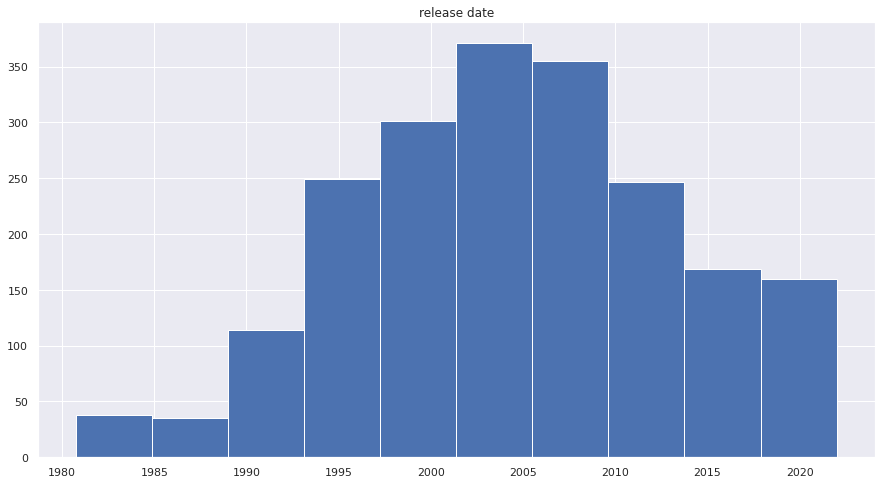

In [162]:
df.hist()

In [164]:
df["release date"].value_counts()

2004-01-01    58
2009-06-23    42
1996-07-02    35
1993-11-16    33
2006-01-01    33
              ..
2008-05-13     1
1999-01-12     1
1991-09-24     1
2003-07-15     1
1990-12-15     1
Name: release date, Length: 379, dtype: int64

In [5]:
df=pd.read_csv("data/lyrics/genius_ner_v7.csv")

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
sia = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()

In [8]:
df["polarity"]=df.apply(lambda row : sia.polarity_scores(str(row["Line Before"]) if row["Line Before"] else "" +"\n"+row["Line"]+"\n" + str(row["Line Before"]) if row["Line Before"] else ""),axis=1)

In [9]:
df

,Artist,Song Name,release date,GPE,Line,Line Before,Line After,polarity
0,French Montana,100,2012-04-13,Harlem,Shout out to ma niggas in Harlem,"Motthaven, you know, Tremont",Can't call no blocks out there,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,French Montana,2 Times,NaN,New York,New York undercovers amongst the others,Still watching out for JC and Torres,The family be couple hundred of us,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,French Montana,50's & 100's,2016-11-05,Bronx,Who run it? (South Bronx),"40 cars, 40 chains2Embed"", ""50's & 100's Lyric...","Who run it? (North Memphis, let me chirp these...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,French Montana,50's & 100's,2016-11-05,South Bronx,Who run it? (South Bronx),"40 cars, 40 chains2Embed"", ""50's & 100's Lyric...","Who run it? (North Memphis, let me chirp these...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,French Montana,Bag,NaN,New York,"Talk about New York, big estate","And grab a casket, my chest christens in the l...",Got the bank and I ain't fit (That's a stash),"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp..."
...,...,...,...,...,...,...,...,...
2552,Ol' Dirty Bastard,Dirty The Moocher,2005-06-21,South Bronx,I acknowledge any MC in a South Bronx town,But the knowledge that I'm givin positively st...,"South Proof Projects, did they really go down","{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'comp..."
2553,Ol' Dirty Bastard,Dogged Out,NaN,Brooklyn,Big Syke daddy with the Brooklyn Zu,"Get gone with the thong, crew comin' through","You know what to do, freaky sucky sucky","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2554,Ol' Dirty Bastard,Dogged Out,NaN,New York,"From New York to Cali', whylin' (wild)",Hoppin' all night it don't make no sense (na na),I got the bitch in the alley howlin' (beitch),"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp..."
2555,Ol' Dirty Bastard,Dogged Out,NaN,Brooklyn,All you motherfuckers that call yourself Brook...,"Yo, on the real side, man","Represent your zoo, you understand what I\'m s...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [10]:
df["pos"]=df["polarity"].apply(lambda polarity : polarity.get("pos"))
df["neg"]=df["polarity"].apply(lambda polarity : polarity.get("neg"))
df["neu"]=df["polarity"].apply(lambda polarity : polarity.get("neu"))
df["compound"]=df["polarity"].apply(lambda polarity : polarity.get("compound"))

In [40]:
places=list(df["GPE"].value_counts()[(df["GPE"].value_counts()>12)].index)
print(len(places))
less_places = list(df["GPE"].value_counts()[(df["GPE"].value_counts()>80)].index)
print(len(less_places))
df_selected=df[df["GPE"].isin(selected_places)]
df_filtered=df[df["GPE"].isin(places)]
df_sample=df[df["GPE"].isin(less_places)]

19
7


In [41]:
df_selected

,Artist,Song Name,release date,GPE,Line,Line Before,Line After,polarity,pos,neg,neu,compound
0,French Montana,100,2012-04-13,Harlem,Shout out to ma niggas in Harlem,"Motthaven, you know, Tremont",Can't call no blocks out there,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
1,French Montana,2 Times,NaN,New York,New York undercovers amongst the others,Still watching out for JC and Torres,The family be couple hundred of us,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,French Montana,50's & 100's,2016-11-05,Bronx,Who run it? (South Bronx),"40 cars, 40 chains2Embed"", ""50's & 100's Lyric...","Who run it? (North Memphis, let me chirp these...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
3,French Montana,50's & 100's,2016-11-05,South Bronx,Who run it? (South Bronx),"40 cars, 40 chains2Embed"", ""50's & 100's Lyric...","Who run it? (North Memphis, let me chirp these...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
4,French Montana,Bag,NaN,New York,"Talk about New York, big estate","And grab a casket, my chest christens in the l...",Got the bank and I ain't fit (That's a stash),"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.286,0.0,0.714,0.4939
...,...,...,...,...,...,...,...,...,...,...,...,...
2552,Ol' Dirty Bastard,Dirty The Moocher,2005-06-21,South Bronx,I acknowledge any MC in a South Bronx town,But the knowledge that I'm givin positively st...,"South Proof Projects, did they really go down","{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'comp...",0.397,0.0,0.603,0.6808
2553,Ol' Dirty Bastard,Dogged Out,NaN,Brooklyn,Big Syke daddy with the Brooklyn Zu,"Get gone with the thong, crew comin' through","You know what to do, freaky sucky sucky","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2554,Ol' Dirty Bastard,Dogged Out,NaN,New York,"From New York to Cali', whylin' (wild)",Hoppin' all night it don't make no sense (na na),I got the bitch in the alley howlin' (beitch),"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.173,0.0,0.827,0.2235
2555,Ol' Dirty Bastard,Dogged Out,NaN,Brooklyn,All you motherfuckers that call yourself Brook...,"Yo, on the real side, man","Represent your zoo, you understand what I\'m s...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [42]:
df_filtered["GPE"]=df_filtered["GPE"].astype("str").astype("category")
df_sample["GPE"]=df_sample["GPE"].astype("str").astype("category")
df_selected["GPE"]=df_selected["GPE"].astype("str").astype("category")

/tmp/ipykernel_9203/2237620576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["GPE"]=df_filtered["GPE"].astype("str").astype("category")
/tmp/ipykernel_9203/2237620576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["GPE"]=df_sample["GPE"].astype("str").astype("category")


In [43]:
df_selected.to_csv("data/selected_polarity-{}.csv".format(datetime.now()))

In [44]:
df_selected=df_selected.dropna()

In [45]:
df_selected["decade"]=df_selected["release date"].apply(lambda date : int(pd.to_datetime(date).year/10)*10)

/tmp/ipykernel_9203/1525652466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["decade"]=df_selected["release date"].apply(lambda date : int(pd.to_datetime(date).year/10)*10)


In [46]:
df_selected

,Artist,Song Name,release date,GPE,Line,Line Before,Line After,polarity,pos,neg,neu,compound,decade
0,French Montana,100,2012-04-13,Harlem,Shout out to ma niggas in Harlem,"Motthaven, you know, Tremont",Can't call no blocks out there,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2010
2,French Montana,50's & 100's,2016-11-05,Bronx,Who run it? (South Bronx),"40 cars, 40 chains2Embed"", ""50's & 100's Lyric...","Who run it? (North Memphis, let me chirp these...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2010
3,French Montana,50's & 100's,2016-11-05,South Bronx,Who run it? (South Bronx),"40 cars, 40 chains2Embed"", ""50's & 100's Lyric...","Who run it? (North Memphis, let me chirp these...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2010
6,French Montana,Big Cap,2012-04-13,Bronx,"South Bronx, Pun, stab him like Un","Shout to Diddy for the flavor, Hova, where the...","Or that ""Machine Gun Funk"", Big Poppa","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2010
7,French Montana,Big Cap,2012-04-13,South Bronx,"South Bronx, Pun, stab him like Un","Shout to Diddy for the flavor, Hova, where the...","Or that ""Machine Gun Funk"", Big Poppa","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,Ol' Dirty Bastard,Dirty And Thirsty,2020-03-28,Brownsville,"Brownsville, pull your gold card membership",Somebody gotta die for this shit to be over,"Rikers Island styling, just courted sentences","{'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'comp...",0.000,0.517,0.483,-0.8176,2020
2548,Ol' Dirty Bastard,Dirty And Thirsty,2020-03-28,Brooklyn,"Chkccha ckchcka Brooklyn, zucka Zoo",*more nonsense noises*,"C'mon baby baby, baby, baby","{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...",0.000,0.574,0.426,-0.4019,2020
2550,Ol' Dirty Bastard,Dirty The Moocher,2005-06-21,America,Livin in America's fuckin fucked up,Stickin my middle fuckin finger at you,When I was young some say I had no sense,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2000
2551,Ol' Dirty Bastard,Dirty The Moocher,2005-06-21,Bronx,I acknowledge any MC in a South Bronx town,But the knowledge that I'm givin positively st...,"South Proof Projects, did they really go down","{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'comp...",0.397,0.000,0.603,0.6808,2000


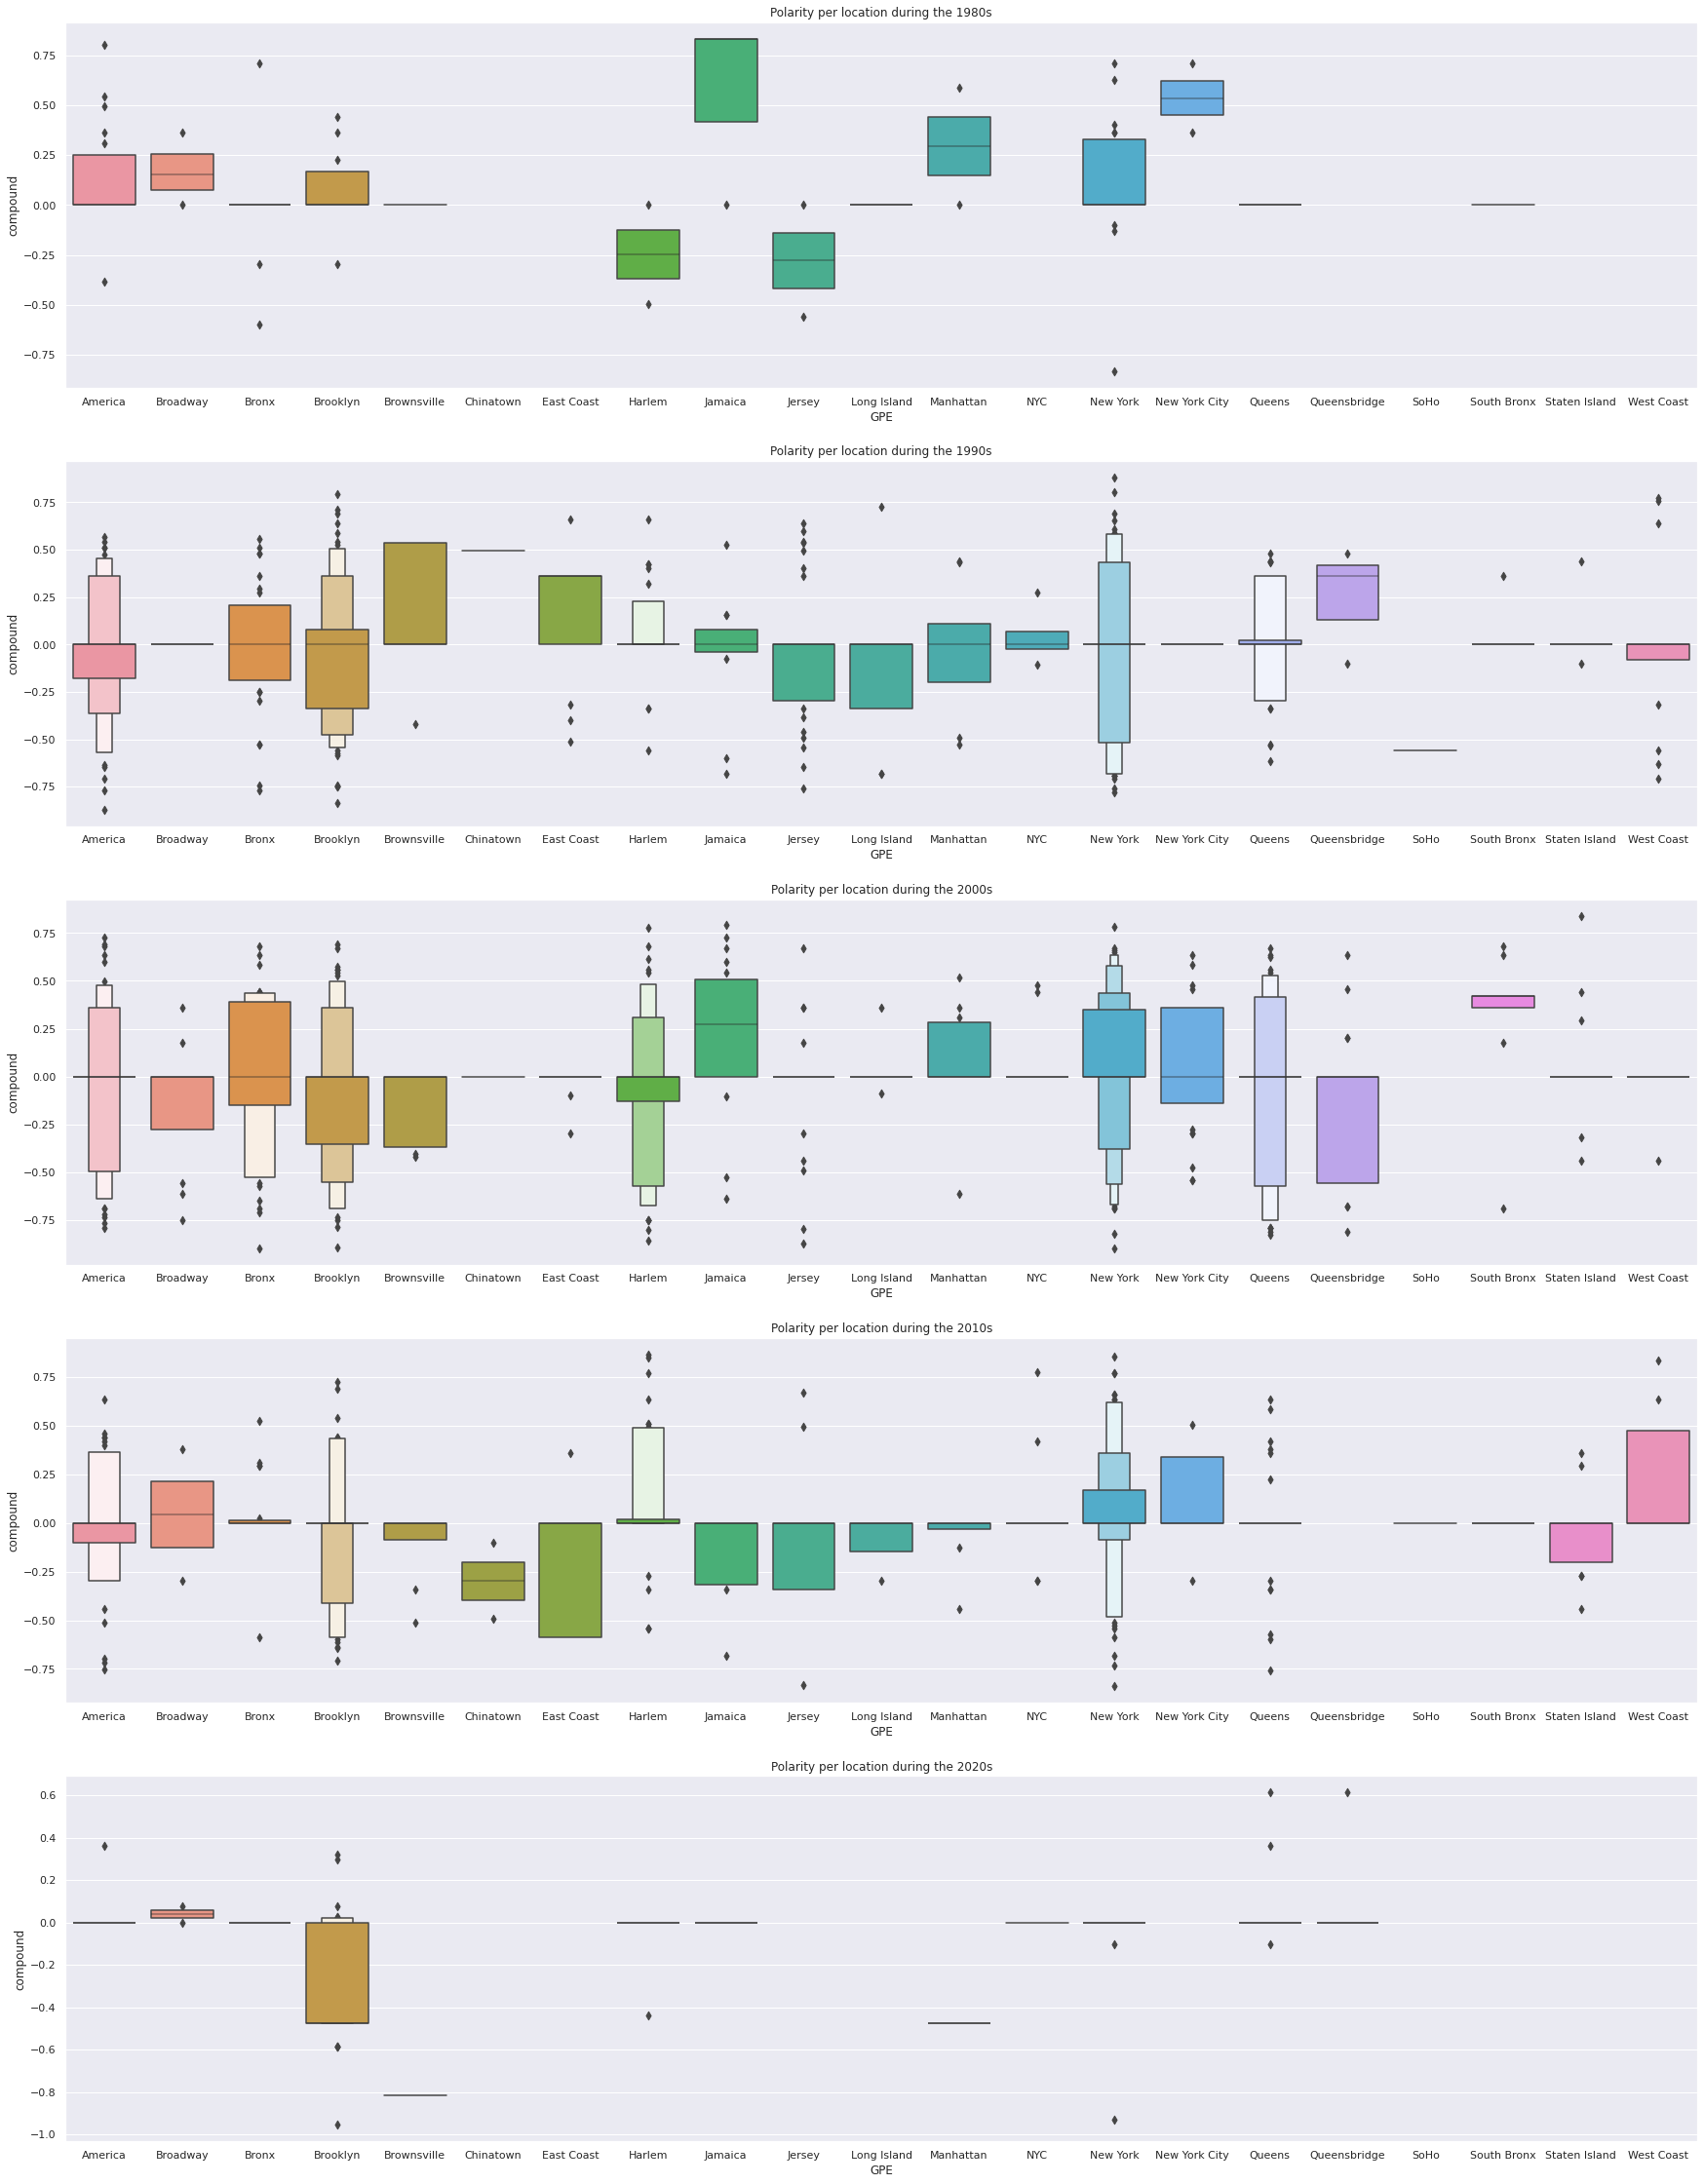

In [66]:
fig, axs = plt.subplots(nrows=5, figsize=(30,40))
index=0
for label, grp in df_selected.groupby('decade'):
    sns.boxenplot(data=grp, y="compound", x="GPE",ax = axs[index], label = label).set_title("Polarity per location during the {}s".format(label))
    index+=1


TODO : plot la distribution entière y